EV Market(Using Market Segmentation)

In [3]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import kaleido

Behavioural Market Segmentation

1. Collecting Dataset


In [4]:
evdata = pd.read_csv('evdata.csv')
print(evdata.columns)

Index(['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Personal loan', 'Total Salary', 'Price'],
      dtype='object')


In [5]:
df = pd.read_csv('evdata.csv')
df

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000
...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,2400000,1600000
95,50,Salaried,Married,Post Graduate,3,No,5100000,1600000
96,51,Business,Married,Graduate,2,Yes,2200000,1100000
97,51,Salaried,Married,Post Graduate,2,No,4000000,1500000


In [6]:
df.describe

<bound method NDFrame.describe of     Age Profession Marrital Status      Education  No of Dependents  \
0    27   Salaried          Single  Post Graduate                 0   
1    35   Salaried         Married  Post Graduate                 2   
2    45   Business         Married       Graduate                 4   
3    41   Business         Married  Post Graduate                 3   
4    31   Salaried         Married  Post Graduate                 2   
..  ...        ...             ...            ...               ...   
94   27   Business          Single       Graduate                 0   
95   50   Salaried         Married  Post Graduate                 3   
96   51   Business         Married       Graduate                 2   
97   51   Salaried         Married  Post Graduate                 2   
98   51   Salaried         Married  Post Graduate                 2   

   Personal loan  Total Salary    Price  
0            Yes        800000   800000  
1            Yes       200000

2. Exploring Data(using evdata.csv file)

In [7]:
dimensions = evdata.shape
print(dimensions)

(99, 8)


In [8]:
print(evdata.head(3))

   Age Profession Marrital Status      Education  No of Dependents  \
0   27   Salaried          Single  Post Graduate                 0   
1   35   Salaried         Married  Post Graduate                 2   
2   45   Business         Married       Graduate                 4   

  Personal loan  Total Salary    Price  
0           Yes        800000   800000  
1           Yes       2000000  1000000  
2           Yes       1800000  1200000  


In [9]:
print(pd.isnull(df).sum())

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
Total Salary        0
Price               0
dtype: int64


In [10]:
df.rename(columns={'Personal loan':'Car_Loan'},inplace=True)
df.rename(columns={'Price':'EV_Price'},inplace=True)
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


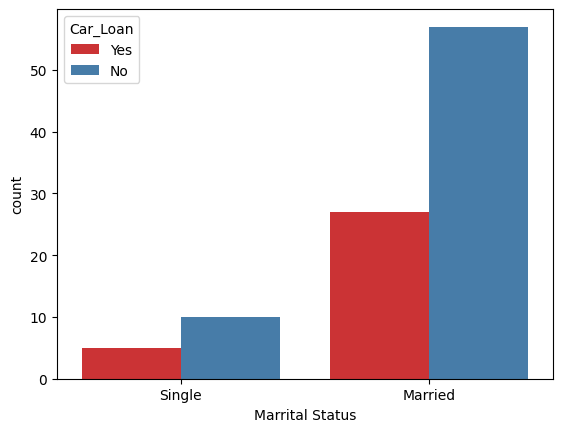

In [11]:
# Plotting the Car loan status
sns.countplot(x ='Marrital Status', hue = 'Car_Loan',  data = df, palette = 'Set1')
plt.show()

In [12]:
(df['Marrital Status'].value_counts()['Married'])/((df['Marrital Status'].value_counts()['Married'])+(df['Marrital Status'].value_counts()['Single']))*100
     

np.float64(84.84848484848484)

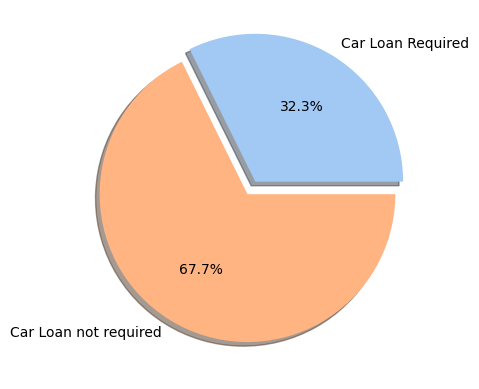

In [73]:
#Getting labels and data
labels = ['Car Loan Required','Car Loan not required']
Loan_status = [df.query('Car_Loan == "Yes"').Car_Loan.count(),df.query('Car_Loan == "No"').Car_Loan.count()]

# declaring exploding pie
explode = [0.1, 0]
# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')
  
# plotting data on chart
plt.pie(Loan_status, labels=labels, colors=palette_color, shadow = "True",
        explode=explode, autopct='%1.1f%%')
  
# displaying chart
plt.show()

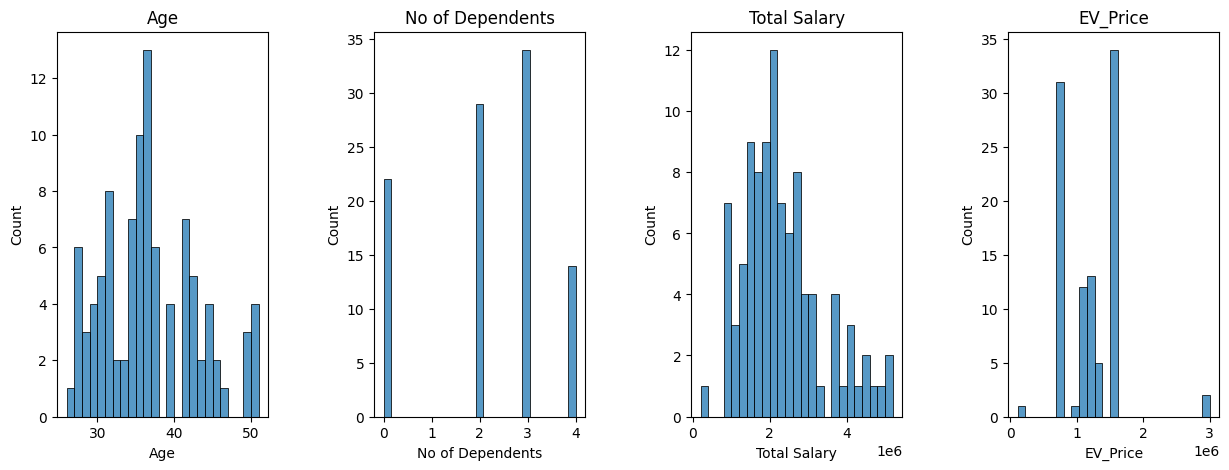

In [13]:
# Plotting the fequency of each entry for consumer features - Age, No. 0f Dependents, Total Salary, EV_Price
plt.figure(1, figsize=(15,5))
n=0

for x in ['Age', 'No of Dependents' ,'Total Salary'  ,'EV_Price']:
  n += 1
  plt.subplot(1,4,n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.histplot(df[x], bins= 25)
  plt.title(f'{x}')
plt.show()

In [14]:
!pip install kmodes
from kmodes.kprototypes import KPrototypes


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


3. Extracting Segments(using kmodes clustering)


In [15]:
# Kmodes is similar to K means clustering when computing distance for continuous data using mean but for categorical data it uses the mode
# Frequency based dissimilarity measure
# Hence it is more preferrable for clustering multiple datatypes 
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [16]:
cluster_features = list(df.columns)
cluster_data = df[cluster_features].values

In [17]:
cluster_data[:, 0]

array([27, 35, 45, 41, 31, 28, 31, 33, 34, 34, 35, 35, 29, 30, 31, 49, 26,
       27, 29, 30, 37, 35, 36, 35, 35, 35, 35, 36, 36, 36, 41, 41, 41, 43,
       42, 42, 29, 30, 30, 31, 31, 32, 32, 34, 34, 34, 36, 36, 36, 36, 49,
       49, 44, 44, 41, 41, 41, 27, 27, 28, 28, 30, 31, 31, 31, 39, 39, 39,
       39, 37, 37, 37, 37, 35, 36, 36, 36, 36, 44, 45, 46, 44, 43, 42, 42,
       42, 29, 33, 34, 34, 35, 36, 37, 27, 27, 50, 51, 51, 51],
      dtype=object)

In [18]:
cluster_data[:, 0] = cluster_data[:, 0].astype(float)
cluster_data[:, 4] = cluster_data[:, 4].astype(float)
cluster_data[:, 6] = cluster_data[:, 6].astype(float)
cluster_data[:, 7] = cluster_data[:, 7].astype(float)

Finding number of clusters using KPrototypes

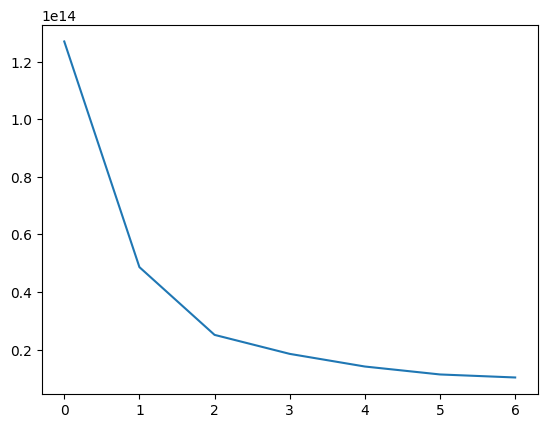

In [20]:


cost = []
for num_clusters in list(range(1,8)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(cluster_data, categorical=[1,2,3,5])
    cost.append(kproto.cost_)

plt.plot(cost)

In [21]:
cost

[np.float64(126979657487180.34),
 np.float64(48616816198579.65),
 np.float64(25087753148183.234),
 np.float64(18491809410726.285),
 np.float64(14099253855131.873),
 np.float64(11342834153820.58),
 np.float64(10294929196593.104)]

In [22]:
kproto = KPrototypes(n_clusters=2, verbose=2,max_iter=20)
clusters = kproto.fit_predict(cluster_data, categorical=[1,2,3,5])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 9, ncost: 50057040964014.66
Run: 1, iteration: 2/20, moves: 1, ncost: 50020391397205.32
Run: 1, iteration: 3/20, moves: 0, ncost: 50020391397205.32
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 29, ncost: 60049361834687.586
Run: 2, iteration: 2/20, moves: 19, ncost: 50447073534650.24
Run: 2, iteration: 3/20, moves: 3, ncost: 50057040964014.66
Run: 2, iteration: 4/20, moves: 1, ncost: 50020391397205.32
Run: 2, iteration: 5/20, moves: 0, ncost: 50020391397205.32
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 20, ncost: 51010804795368.1
Run: 3, iteration: 2/20, moves: 5, ncost: 50057040964014.66
Run: 3, iteration: 3/20, moves: 1, ncost: 50020391397205.32
Run: 3, iteration: 4/

Appending the clusters

In [23]:
df['Cluster'] = clusters

In [24]:
# Average cost of the EV
df.EV_Price.mean()


np.float64(1194040.4040404041)

In [25]:
# Average cost of a car in segment 1 
df.EV_Price[df.Cluster==0].mean()

np.float64(1052763.1578947369)

In [26]:
df['EV_Price'][df.Cluster==1].max()

np.int64(3000000)

In [27]:
df['Cluster'].value_counts(normalize=True) * 100

Cluster
0    76.767677
1    23.232323
Name: proportion, dtype: float64

In [28]:
# Segregrating each cluster

Cluster_0 = df[df.Cluster==0]
Cluster_1 = df[df.Cluster==1]

In [29]:
df['Cluster'].value_counts()

Cluster
0    76
1    23
Name: count, dtype: int64

Plotting the effect of salary and EV price on cluster data

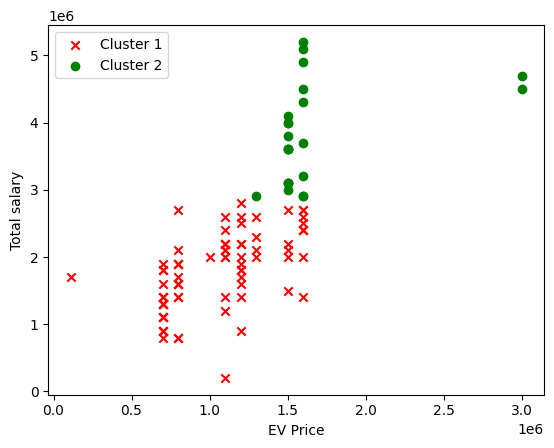

In [30]:
plt.scatter(Cluster_0.EV_Price, Cluster_0['Total Salary'],color='red', marker = 'x', label = 'Cluster 1')
plt.scatter(Cluster_1.EV_Price, Cluster_1['Total Salary'],color='green', label = 'Cluster 2')
plt.legend(loc="upper left")

plt.xlabel('EV Price')
plt.ylabel('Total salary')
plt.show()

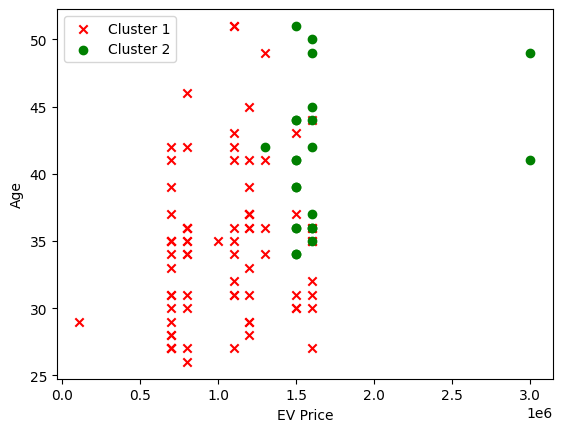

In [31]:
plt.scatter(Cluster_0.EV_Price, Cluster_0['Age'],color='red', marker = 'x', label = 'Cluster 1')
plt.scatter(Cluster_1.EV_Price, Cluster_1['Age'],color='green', label = 'Cluster 2')
plt.legend(loc = "upper left")

plt.xlabel('EV Price')
plt.ylabel('Age')
plt.show()

In [32]:
from mpl_toolkits.mplot3d import Axes3D

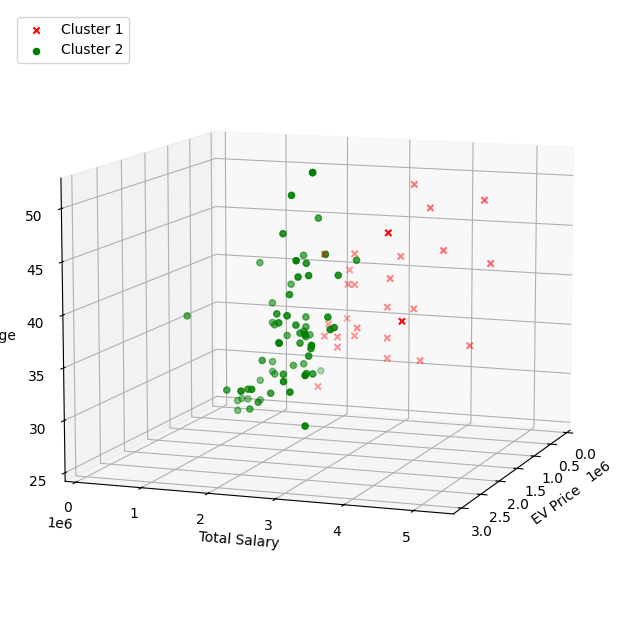

In [45]:
# plotting influence of age 

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(Cluster_0.EV_Price, Cluster_0['Total Salary'], Cluster_0['Age'], color='red', marker = 'x', label = 'Cluster 1')
ax.scatter(Cluster_1.EV_Price, Cluster_1['Total Salary'],Cluster_1['Age'], color='green', label = 'Cluster 2')
plt.legend(loc = 'upper left')

ax.view_init(10, 20)

plt.xlabel("EV Price")
plt.ylabel("Total Salary")
ax.set_zlabel('Age')
plt.show()

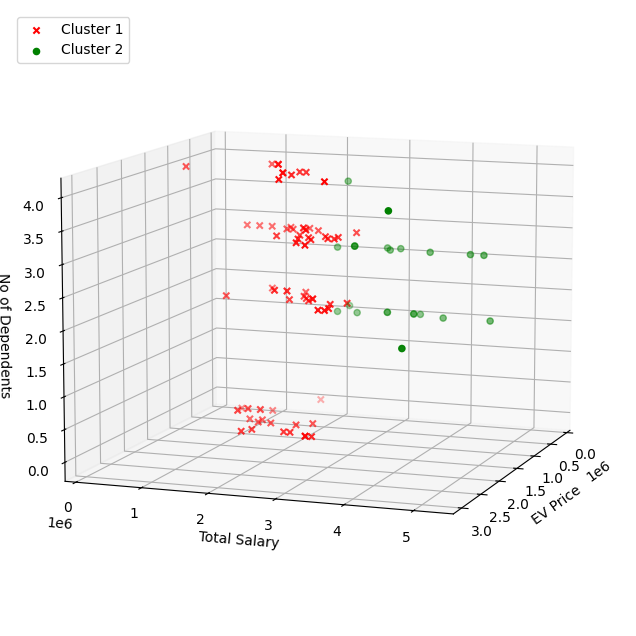

In [33]:
# plotting influence of No of Dependents

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(Cluster_0.EV_Price, Cluster_0['Total Salary'], Cluster_0['No of Dependents'], color='red', marker = 'x', label = 'Cluster 1')
ax.scatter(Cluster_1.EV_Price, Cluster_1['Total Salary'],Cluster_1['No of Dependents'], color='green', label = 'Cluster 2')
plt.legend(loc = 'upper left')
ax.view_init(10,20)

plt.xlabel("EV Price")
plt.ylabel("Total Salary")
ax.set_zlabel('No of Dependents')
plt.show()

In [34]:
df['No of Dependents'].value_counts()

No of Dependents
3    34
2    29
0    22
4    14
Name: count, dtype: int64

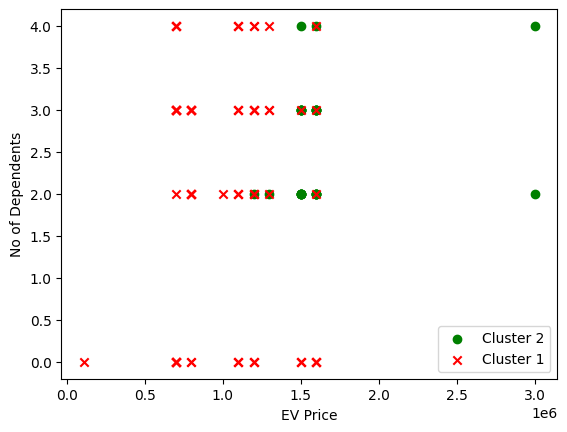

In [95]:
# plotting the effct of no of dependents and ev price on cluster data


plt.scatter(Cluster_1.EV_Price, Cluster_1['No of Dependents'],color='green', label = 'Cluster 2')
plt.scatter(Cluster_0.EV_Price, Cluster_0['No of Dependents'],color='red', marker = 'x', label = 'Cluster 1')
plt.legend(loc="lower right")

plt.xlabel('EV Price')
plt.ylabel('No of Dependents')
plt.show()

In [35]:
df.isnull().sum()

# Handling missing values if necessary
df = df.dropna()  # Simple approach: drop rows with missing values

# Encode categorical variables if any
categorical_columns = df.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display the first few rows of the encoded data
data_encoded.head()

,Age,No of Dependents,Total Salary,EV_Price,Cluster,Profession_Business,Profession_Salaried,Marrital Status_Married,Marrital Status_Single,Education_Graduate,Education_Post Graduate,Car_Loan_No,Car_Loan_Yes
0,27,0,800000,800000,0,False,True,False,True,False,True,False,True
1,35,2,2000000,1000000,0,False,True,True,False,False,True,False,True
2,45,4,1800000,1200000,0,True,False,True,False,True,False,False,True
3,41,3,2200000,1200000,0,True,False,True,False,False,True,True,False
4,31,2,2600000,1600000,0,False,True,True,False,False,True,False,True


In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

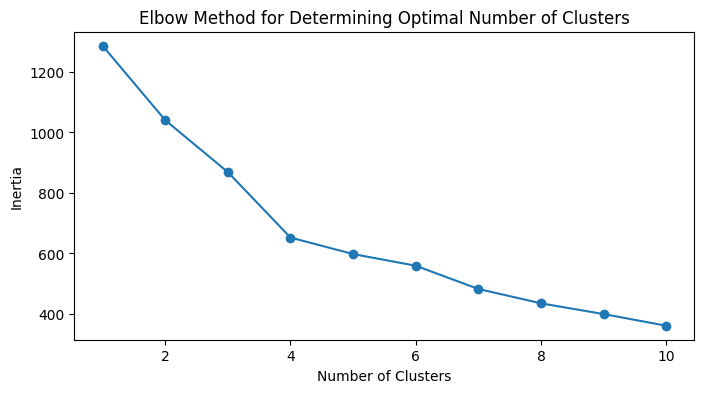

In [37]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

# Determine the optimal number of clusters using the elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.show()

In [50]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)
print("\nFirst few rows with cluster labels:")
print(df.head())


First few rows with cluster labels:
   Age Profession Marrital Status      Education  No of Dependents Car_Loan  \
0   27   Salaried          Single  Post Graduate                 0      Yes   
1   35   Salaried         Married  Post Graduate                 2      Yes   
2   45   Business         Married       Graduate                 4      Yes   
3   41   Business         Married  Post Graduate                 3       No   
4   31   Salaried         Married  Post Graduate                 2      Yes   

   Total Salary  EV_Price  Cluster  
0        800000    800000        2  
1       2000000   1000000        2  
2       1800000   1200000        2  
3       2200000   1200000        0  
4       2600000   1600000        2  


4. Profiling Segments

In [76]:
# Profile the segments
print("\nData types after clustering:")
print(df.dtypes)
segment_profile = df.groupby('Cluster').mean(numeric_only = True)
print("\nSegment profiles:")
print(segment_profile)


Data types after clustering:
Age                  int64
Profession          object
Marrital Status     object
Education           object
No of Dependents     int64
Car_Loan            object
Total Salary         int64
EV_Price             int64
Cluster              int32
dtype: object

Segment profiles:
               Age  No of Dependents  Total Salary      EV_Price
Cluster                                                         
0        34.104167          1.791667  1.814583e+06  1.135625e+06
1        41.545455          2.681818  3.809091e+06  1.672727e+06
2        36.000000          2.448276  1.858621e+06  9.275862e+05


In [77]:
from sklearn.cluster import KMeans

# Assuming data_scaled is the standardized data
k = 3  # Adjust as per the optimal number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)

# Check the first few rows of the DataFrame
print("Data after clustering:")
print(df.head())

Data after clustering:
   Age Profession Marrital Status      Education  No of Dependents Car_Loan  \
0   27   Salaried          Single  Post Graduate                 0      Yes   
1   35   Salaried         Married  Post Graduate                 2      Yes   
2   45   Business         Married       Graduate                 4      Yes   
3   41   Business         Married  Post Graduate                 3       No   
4   31   Salaried         Married  Post Graduate                 2      Yes   

   Total Salary  EV_Price  Cluster  
0        800000    800000        2  
1       2000000   1000000        2  
2       1800000   1200000        2  
3       2200000   1200000        0  
4       2600000   1600000        2  


In [78]:
print("DataFrame columns:")
print(df.columns)

DataFrame columns:
Index(['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Car_Loan', 'Total Salary', 'EV_Price', 'Cluster'],
      dtype='object')


In [81]:
if 'Cluster' not in df.columns:
    raise KeyError("'Cluster' column does not exist in the DataFrame.")
print("Data with 'Cluster' column:")
print(df[['Cluster']].head())

Data with 'Cluster' column:
   Cluster
0        2
1        2
2        2
3        0
4        2


In [82]:
segment_profile = df.groupby('Cluster').mean(numeric_only = True).reset_index()

In [83]:
for cluster in segment_profile['Cluster'].unique():
    print(f"\nCharacteristics of Segment {cluster}:")
    segment_data = segment_profile[segment_profile['Cluster'] == cluster]
    for column in segment_data.columns:
        if column != 'Cluster':
            print(f"{column}: {segment_data[column].values[0]:.2f}")


Characteristics of Segment 0:
Age: 34.10
No of Dependents: 1.79
Total Salary: 1814583.33
EV_Price: 1135625.00

Characteristics of Segment 1:
Age: 41.55
No of Dependents: 2.68
Total Salary: 3809090.91
EV_Price: 1672727.27

Characteristics of Segment 2:
Age: 36.00
No of Dependents: 2.45
Total Salary: 1858620.69
EV_Price: 927586.21


In [84]:
print("\nComparing segments:")
for column in segment_profile.columns:
    if column != 'Cluster':
        print(f"\n{column}:")
        for cluster in segment_profile['Cluster'].unique():
            print(f"Segment {cluster}: {segment_profile[segment_profile['Cluster'] == cluster][column].values[0]:.2f}")


Comparing segments:

Age:
Segment 0: 34.10
Segment 1: 41.55
Segment 2: 36.00

No of Dependents:
Segment 0: 1.79
Segment 1: 2.68
Segment 2: 2.45

Total Salary:
Segment 0: 1814583.33
Segment 1: 3809090.91
Segment 2: 1858620.69

EV_Price:
Segment 0: 1135625.00
Segment 1: 1672727.27
Segment 2: 927586.21


5. Describing Segments

In [85]:
# Summarize each segment
for cluster in segment_profile['Cluster'].unique():
    print(f"\nSummary for Segment {cluster}:")
    segment_data = segment_profile[segment_profile['Cluster'] == cluster]
    summary = f"Segment {cluster} is characterized by "
    characteristics = []
    for column in segment_data.columns:
        if column != 'Cluster':
            characteristics.append(f"{column} with an average of {segment_data[column].values[0]:.2f}")
    summary += ", ".join(characteristics) + "."
    print(summary)


Summary for Segment 0:
Segment 0 is characterized by Age with an average of 34.10, No of Dependents with an average of 1.79, Total Salary with an average of 1814583.33, EV_Price with an average of 1135625.00.

Summary for Segment 1:
Segment 1 is characterized by Age with an average of 41.55, No of Dependents with an average of 2.68, Total Salary with an average of 3809090.91, EV_Price with an average of 1672727.27.

Summary for Segment 2:
Segment 2 is characterized by Age with an average of 36.00, No of Dependents with an average of 2.45, Total Salary with an average of 1858620.69, EV_Price with an average of 927586.21.


6. Customising the Marketing Mix

In this step, the marketing mix is designed. McDonald's managers may choose to target segment 3 (young customers who enjoy McDonald's food but find it expensive).

Create an MCSUPERBUDGET line to meet the price expectations of this segment (4Ps: Price). The advantage of this approach is that members of segment 3 may become loyal customers who, as they earn more money, will no longer care about price and switch to regular McDonald's products.

7. Evaluation and Monitoring

After completing the market segmentation analysis and marketing activities, it's important to evaluate the success of the strategy and monitor the market on an ongoing basis. Continuous basis. Segment 3 members may earn more money, making the MCSUPERBUDGET line unsuitable for them. Existing market segments may undergo changes. Changes can occur in the larger marketplace, such as when new competitors enter. To adapt to changing market conditions, McDonald's management must monitor all potential sources of change and adjust their marketing strategies accordingly.